In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
db = pd.read_csv(r'C:\Users\fecuadra\OneDrive - University of Tasmania\Desktop\Daily projects\Daily-tasks\Sonar data pred\sonar data.csv')

In [17]:
db.describe()
#

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [19]:
db.corr

<bound method DataFrame.corr of      0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
202  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
203  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
204  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
205  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
206  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

     0.2111  ...  0

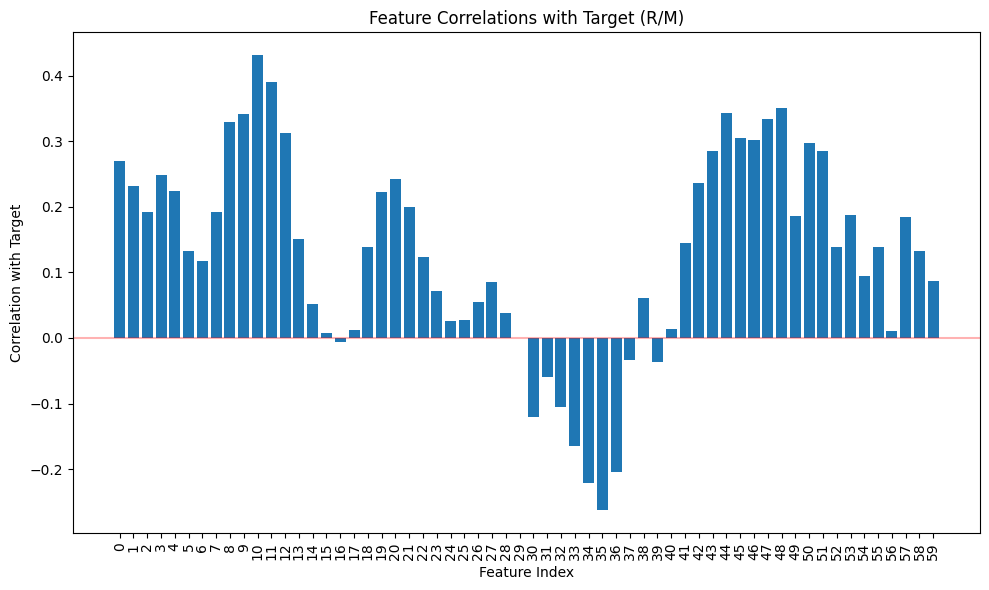

In [4]:
# Convert R/M to numeric (0/1)
db_numeric = db.copy()
db_numeric.iloc[:, -1] = (db_numeric.iloc[:, -1] == 'M').astype(int)

# Calculate correlations
correlations = db_numeric.corr()

# Get correlations with target variable (last column)
target_correlations = correlations.iloc[-1][:-1]  # excluding correlation with itself

# Create a figure
plt.figure(figsize=(10, 6))

# Create bar plot of correlations
plt.bar(range(len(target_correlations)), target_correlations)
plt.xticks(range(len(target_correlations)), range(60), rotation=90)
plt.xlabel('Feature Index')
plt.ylabel('Correlation with Target')
plt.title('Feature Correlations with Target (R/M)')

# Add a horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)

plt.tight_layout()

In [5]:
# Get columns with correlation >= 0.3 (absolute value)
high_corr_cols = target_correlations[abs(target_correlations) >= 0.3].index.tolist()

# Add the target column 'R' to the list of columns to keep
high_corr_cols.append('R')

# Create new dataframe with only high correlation columns
db_filtered = db[high_corr_cols]

In [6]:
db_filtered

,0.3109,0.2111,0.1609,0.1582,0.2238,0.2641,0.1386,0.1051,0.1343,0.0383,R
0,0.3337,0.2872,0.4918,0.6552,0.6919,0.0621,0.0203,0.0530,0.0742,0.0409,R
1,0.5598,0.6194,0.6333,0.7060,0.5544,0.2111,0.0176,0.1348,0.0744,0.0130,R
2,0.0598,0.1264,0.0881,0.1992,0.0184,0.4295,0.3654,0.2655,0.1576,0.0681,R
3,0.3564,0.4459,0.4152,0.3952,0.4256,0.0692,0.0528,0.0357,0.0085,0.0230,R
4,0.2105,0.3039,0.2988,0.4250,0.6343,0.1192,0.1089,0.0623,0.0494,0.0264,R
...,...,...,...,...,...,...,...,...,...,...,...
202,0.2328,0.2684,0.3108,0.2933,0.2275,0.0902,0.1085,0.1521,0.1363,0.0858,M
203,0.1030,0.2154,0.3085,0.3425,0.2990,0.0954,0.0080,0.0790,0.1255,0.0647,M
204,0.1258,0.2529,0.2716,0.2374,0.1878,0.0910,0.0757,0.1059,0.1005,0.0535,M
205,0.1945,0.2354,0.2898,0.2812,0.1578,0.1319,0.0985,0.1258,0.0954,0.0489,M


In [7]:
# Separate features (X) and target (y)
X = db_filtered.iloc[:, :-1]  # All columns except the last one
y = db_filtered.iloc[:, -1]   # Last column (R/M)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7349397590361446

Classification Report:
              precision    recall  f1-score   support

           M       0.76      0.76      0.76        45
           R       0.71      0.71      0.71        38

    accuracy                           0.73        83
   macro avg       0.73      0.73      0.73        83
weighted avg       0.73      0.73      0.73        83



In [10]:
####with Random Forest
from sklearn.ensemble import RandomForestClassifier
import shap

# Create and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get predictions
rf_pred = rf_model.predict(X_test)

# Print performance metrics
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))

# Calculate SHAP values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)



Random Forest Accuracy: 0.7710843373493976

Random Forest Classification Report:
              precision    recall  f1-score   support

           M       0.75      0.87      0.80        45
           R       0.81      0.66      0.72        38

    accuracy                           0.77        83
   macro avg       0.78      0.76      0.76        83
weighted avg       0.78      0.77      0.77        83



<Figure size 1000x800 with 0 Axes>

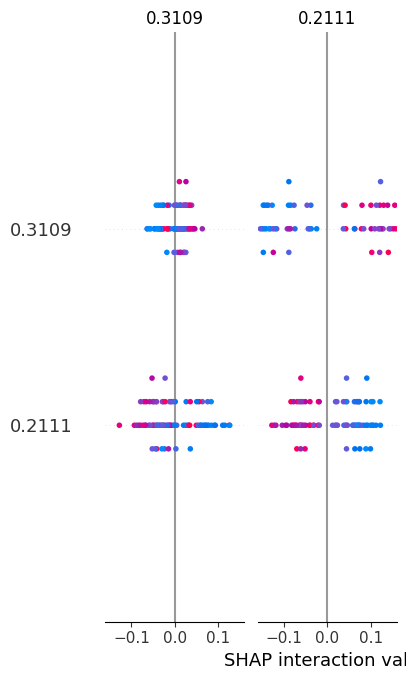

In [9]:
# Plot SHAP summary
plt.figure(figsize=(10,8))
shap.summary_plot(shap_values, X_test, plot_type="bar")